# Big Data Processes - Exercise No. 3

## <font color = blue>Exploratory Data Analysis</font>

#### Useful shortcuts:
<ul>
    <li>In command mode (use ESC key to enter command mode):</li>
    <ul>
        <li><b>dd</b>: Delete cell</li>
        <li><b>z</b>: Undo cell deletion</li>
        <li><b>b</b>: Create a new cell under the currently selected one</li>
        <li><b>a</b>: Create a new cell above the currently selected one</li>
    </ul>
    <li>In any mode (either command or edit):</li>
    <ul>
        <li><b> Shift+Enter </b>: Execute a cell and advance to the next one</li>
        <li><b> Ctrl+Enter or Command+Enter </b>: Execute a cell and remain on it</li>
    </ul>
</ul>

#### What we will cover today:

<ol>
    <li>What we learned last week</li>
    <li>Exploration!</li>
    <li>Uniques and their number in a column</li>
    <li>Creating new columns</li>
    <li>Creating dataframes out of series</li>
    <li>Visualization through Matplotlib</li>
    <ol>
        <li>Bar charts</li>
        <li>Plots</li>
        <li>Scatter plots</li>
        <li>Histograms</li>
    </ol>
</ol>

In [1]:
#Good old pandas
import pandas as pd

#You can load datasets from links as well!
url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'

dataset = pd.read_csv(url)
dataset

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [2]:
dataset = pd.read_csv("gapminderDataFiveYear.csv", delimiter = ",")
dataset

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


____
### Preliminery exploration

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
year         1704 non-null int64
pop          1704 non-null float64
continent    1704 non-null object
lifeExp      1704 non-null float64
gdpPercap    1704 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [4]:
#Changing the Dtype of a column
dataset['pop'] = dataset['pop'].astype('int64')

In [5]:
dataset.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165877
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846989
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [6]:
dataset.columns

Index(['country', 'year', 'pop', 'continent', 'lifeExp', 'gdpPercap'], dtype='object')

In [7]:
#Selecting a column and using .unique() method gives us unique values within that variable
dataset['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [8]:
#Adding an "n" gives us the count of uniques
dataset['country'].nunique()

142

In [9]:
#Cheap way to check consistency, but what woul happen is we had nan values?
dataset.groupby(['year']).year.count()

year
1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

____
### Creating

In [10]:
#Creating a new column "below50", which checks if the value in "lifeExp" is below 50
dataset['expBelow50'] = dataset['lifeExp'] < 50

In [11]:
#.sum() is another quick method similar to .count(). Others to consider: .mean(), .min(), .max()
below50 = dataset.groupby(['year']).expBelow50.sum()
below50

year
1952    82.0
1957    76.0
1962    70.0
1967    53.0
1972    44.0
1977    34.0
1982    27.0
1987    21.0
1992    21.0
1997    21.0
2002    23.0
2007    19.0
Name: expBelow50, dtype: float64

In [12]:
#Putting the series into a dataframe
below50 = below50.to_frame()
below50

,expBelow50
year,
1952,82.0
1957,76.0
1962,70.0
1967,53.0
1972,44.0
1977,34.0
1982,27.0
1987,21.0
1992,21.0


In [13]:
#Resetting the index
extra_below50 = below50.reset_index()
extra_below50

,year,expBelow50
0,1952,82.0
1,1957,76.0
2,1962,70.0
3,1967,53.0
4,1972,44.0
5,1977,34.0
6,1982,27.0
7,1987,21.0
8,1992,21.0
9,1997,21.0


- - - - - -
### Visualizing

In [14]:
#Library for visualization, naming it plt
import matplotlib.pyplot as plt

#All documentation can be found here: https://matplotlib.org/

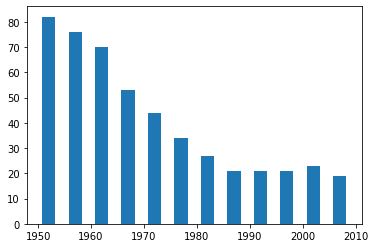

In [15]:
#Source
#https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

# .bar(using the years that are stored in the index for the x-axis, 'expBelow50' for the y-axis, data = variable with data)
plt.bar(below50.index,'expBelow50', data=below50, width = 2.5)

#Only a requirement outside of Jupyter Notebook
plt.show()

In [16]:
#Creating dataframes only consisting of certain countries
denmark = dataset.loc[dataset['country'] == 'Denmark']
mexico = dataset.loc[dataset['country'] == 'Mexico']
china = dataset.loc[dataset['country'] == 'China']

In [17]:
denmark

,country,year,pop,continent,lifeExp,gdpPercap,expBelow50
408,Denmark,1952,4334000,Europe,70.780,9692.385245,False
409,Denmark,1957,4487831,Europe,71.810,11099.659350,False
410,Denmark,1962,4646899,Europe,72.350,13583.313510,False
411,Denmark,1967,4838800,Europe,72.960,15937.211230,False
412,Denmark,1972,4991596,Europe,73.470,18866.207210,False
413,Denmark,1977,5088419,Europe,74.690,20422.901500,False
414,Denmark,1982,5117810,Europe,74.630,21688.040480,False
415,Denmark,1987,5127024,Europe,74.800,25116.175810,False
416,Denmark,1992,5171393,Europe,75.330,26406.739850,False
417,Denmark,1997,5283663,Europe,76.110,29804.345670,False


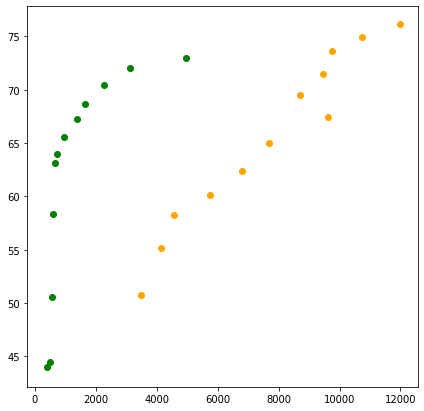

In [18]:
#Source
#https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html

fig=plt.figure(figsize=(7, 7))

plt.scatter('gdpPercap','lifeExp', data=mexico, color = 'orange')
plt.scatter('gdpPercap','lifeExp', data=china, color = 'green')
#plt.scatter('gdpPercap','lifeExp', data=denmark)

plt.show()

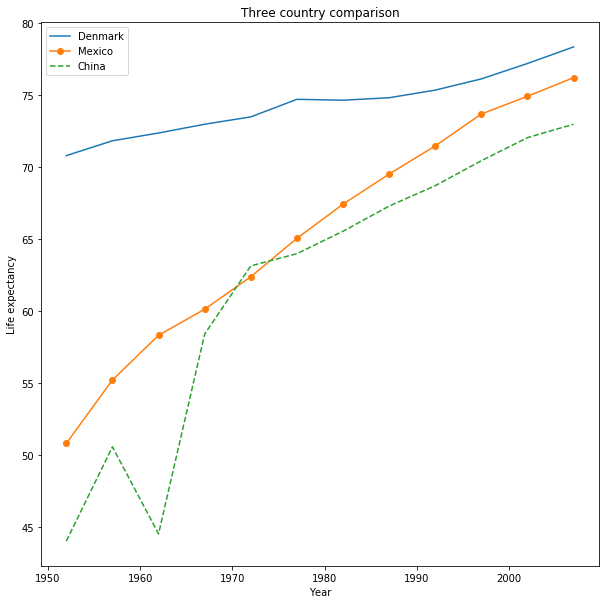

In [19]:
#Source
#https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

#Changing the size of the figure
plt.figure(figsize=(10, 10))

#Plotting a visualization .plot(x, y, data=data)
plt.plot('year', 'lifeExp', data=denmark)
plt.plot('year', 'lifeExp', data=mexico, marker = 'o')
plt.plot('year', 'lifeExp', data=china, linestyle = 'dashed')

#Giving the visualization a title
plt.title("Three country comparison")

#Giving the x-axis a name
plt.xlabel("Year")

#Giving the y-axis a name
plt.ylabel("Life expectancy")

#Adding a legend
plt.legend(['Denmark', 'Mexico', 'China'])

#Only a requirement outside of Jupyter Notebook
plt.show()

In [20]:
#Creating dataframes of two different years
fifty_two = dataset.loc[dataset['year'] == 1952]
two_k_two = dataset.loc[dataset['year'] == 2002]

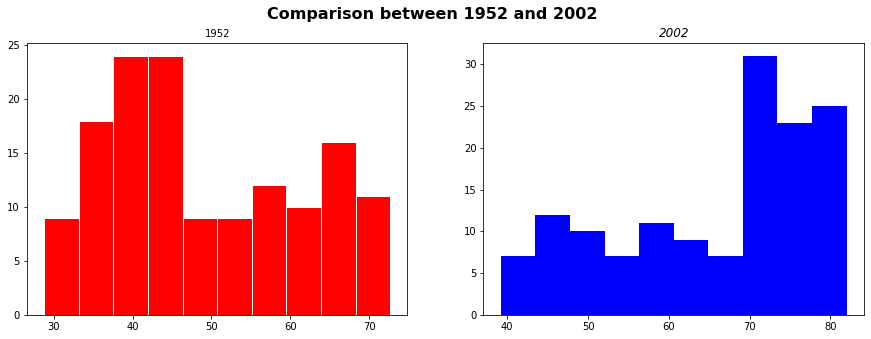

In [21]:
#Source 
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

fig=plt.figure(figsize=(15, 5))
fig.suptitle('Comparison between 1952 and 2002', fontsize = 16, weight= 'bold')


#Why could this be necessary?
#bin_range = [30, 40, 50, 60, 70, 80, 90]


#.add_subplot("row count", "column count", position)
ax1 = fig.add_subplot(1,2,1)

ax1.hist('lifeExp', data=fifty_two, color = 'red', edgecolor='white')
ax1.set_title("1952", fontsize = 10)
#Setting a limit of where the y-axis should start and finish
#ax1.set_ylim(0, 70)



#.add_subplot("row count", "column count", position)
ax2 = fig.add_subplot(1,2,2)

ax2.hist('lifeExp', data=two_k_two, color = 'blue')
ax2.set_title("2002", style = 'italic')



plt.show()

- - - - - 

### Your turn!

<b>E1.</b> Convert the 'year' column to a string type, how do you think this will affect the visualizations? (Try testing it out afterwards)

In [22]:
dataset['year'] = dataset['year'].astype('str')

#We need to define it as 'str' and not 'string'. 
#Google can provide you more information as to why this is considered as a standard

#As for data types, write us TAs an email :)

<b>E2.</b> How many data units are there in total that have <b>Europe</b> as their "continent" value?

In [23]:
europe = dataset.loc[dataset['continent'] == 'Europe']
europe

#At the end, we see 360 rows and that is the answer
#If you used a groupby method, bonus points go to you!

,country,year,pop,continent,lifeExp,gdpPercap,expBelow50
12,Albania,1952,1282697,Europe,55.230,1601.056136,False
13,Albania,1957,1476505,Europe,59.280,1942.284244,False
14,Albania,1962,1728137,Europe,64.820,2312.888958,False
15,Albania,1967,1984060,Europe,66.220,2760.196931,False
16,Albania,1972,2263554,Europe,67.690,3313.422188,False
...,...,...,...,...,...,...,...
1603,United Kingdom,1987,56981620,Europe,75.007,21664.787670,False
1604,United Kingdom,1992,57866349,Europe,76.420,22705.092540,False
1605,United Kingdom,1997,58808266,Europe,77.218,26074.531360,False
1606,United Kingdom,2002,59912431,Europe,78.471,29478.999190,False


<b>E3.</b> Use a scatter plot to visualize <b>Europe's life expectancy</b> and <b>GDP per capita</b> in the year <b>2007</b>

Afterwards try reflecting on what research question we can imagine answering with this visual?


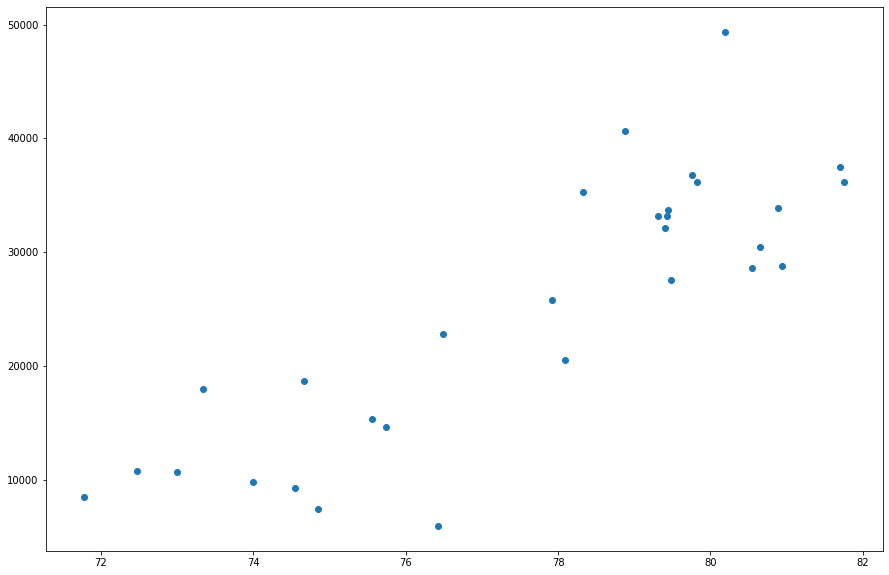

In [28]:
# !!! As you can we are applying loc on EUROPE, not the DATASET !!! 
#Additionally, since we have converted the year to str, we need to use quotation marks
europe_seven = europe.loc[europe['year'] == '2007']

plt.figure(figsize=(15, 10))

plt.scatter(x = 'lifeExp', y = 'gdpPercap', data=europe_seven)

#Keep in mind, data=europe_seven, because that is the filtered dataset

plt.show()

- - - - - 

#### Additional exercises (good for the mind, but see if you have time)
There are hints below the exercises that you need to highlight with your mouse if you want to see them, otherwise try to google your ideas.



<b>E4.</b> Using the .groupby method, can you find the year which had the <b>smallest/minimal life expectancy value</b> in the whole <b>dataset</b>?

<font color ="white"> You need to use a .lifeExp.min() method in the end</font>

In [25]:
dataset.groupby(['year']).lifeExp.min()

#Answer: year 1992

year
1952    28.801
1957    30.332
1962    31.997
1967    34.020
1972    35.400
1977    31.220
1982    38.445
1987    39.906
1992    23.599
1997    36.087
2002    39.193
2007    39.613
Name: lifeExp, dtype: float64

<b>E5.</b> Can you create a new column "roundedLifeExp" that would contain "lifeExp" values rounded up to a whole number?

<font color ="white"> Try Googling "pandas round"</font>

In [29]:
dataset['roundedLifeExp'] = dataset['lifeExp'].round(0)

dataset
#As we can see, the column to the far right has the rounded values

,country,year,pop,continent,lifeExp,gdpPercap,expBelow50,roundedLifeExp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,True,29.0
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,True,30.0
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,True,32.0
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,True,34.0
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,True,36.0
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,False,62.0
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,False,60.0
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,True,47.0
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,True,40.0


<b>E6.</b> Pick a year and use <b>all available continents</b> in the dataset, to visualize <b>life expectancy</b> and <b>GDP per capita</b> however you see best fit (preferably in a single visualization). What kind of distribution can be seen?

<font color ="white"> .unique(), any year (remember that it is a string now), create a dataframe for each continent and use .scatter() plot to visualize the contents</font>

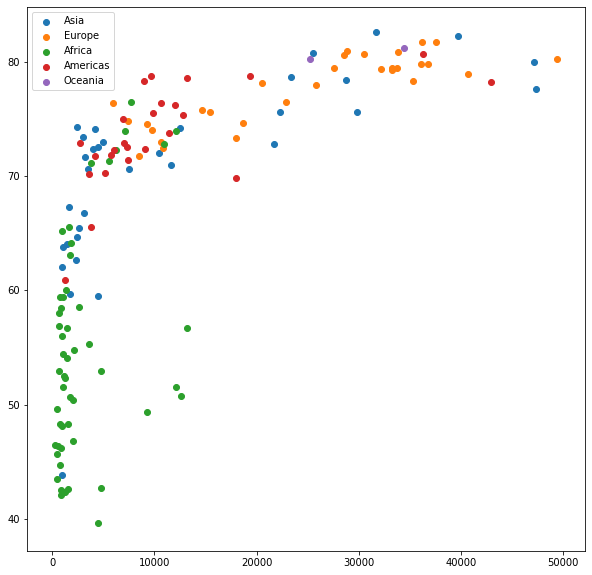

In [27]:
#This is used to determine how many continents we have in the dataset
dataset['continent'].unique()

e6 = dataset.loc[dataset['year'] == '2007']

asia = e6.loc[e6['continent'] == 'Asia']
europe = e6.loc[e6['continent'] == 'Europe']
africa = e6.loc[e6['continent'] == 'Africa']
americas = e6.loc[e6['continent'] == 'Americas']
oceania = e6.loc[e6['continent'] == 'Oceania']

plt.figure(figsize=(10, 10))

plt.scatter('gdpPercap', 'lifeExp', data=asia)
plt.scatter('gdpPercap', 'lifeExp', data=europe)
plt.scatter('gdpPercap', 'lifeExp', data=africa)
plt.scatter('gdpPercap', 'lifeExp', data=americas)
plt.scatter('gdpPercap', 'lifeExp', data=oceania)

plt.legend(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'])

plt.show()